## HW 5
Sevgi Ozturk

## Part I

Consider the following model

\begin{align}
A \sim \mathcal{N}(A; 0, 1.2) \\
R \sim \mathcal{IG}(R; 0.4, 250) \\
x_k | x_{k-1} \sim \mathcal{N}(x_k;Ax_{k-1},R)
\end{align}

#### Draw the directed graphical model and the factor graph.
<img src = "./DGM.png" height="800" width="800"/>
<img src = "./FG.png" height="600" width="600"/>

#### Write the expression for the full joint distribution and assign terms to the individual factors on the factor graph.

\begin{eqnarray}
\phi & = & p(A,R,x_1=\hat x_1,x_0=\hat x_0) \propto p(x_1|x_o,A,R)p(A)p(R) = p(x_1,A,R|x_0) \\
\phi & = & \mathcal{N}(x_k;Ax_{k-1},R)\mathcal{N}(A; 0, 1.2)\mathcal{IG}(R; 0.4, 250) \\
\phi & = & exp(-\frac{1}2 \frac{x_1^2}R + x_ox_1\frac{A}R-\frac{1}2\frac{x_0^2A^2}R-\frac{1}2log2 \pi R)exp(-\frac{A^2}{2.4}-\frac{1}2log2.4 \pi )exp(-1.4logR-\frac{250}R-log\Gamma (0.4)+0.4log250) \\
\phi_A & = & exp(-\frac{A^2}{2P}) = exp(-\frac{A^2}{2.4})\\
\phi_R & = & exp(-\frac{1}2 \frac{x_1^2}R-\frac{logR}2-(\mathcal{v}+1)logR-\frac{\mathcal{v}}{\beta R}) = exp(- (\mathcal{v}+1+\frac{1}2)logR-\left( \frac{v}\beta+\frac{x_1^2}2 \right)\frac{1}R)\\
\phi_{X_oX_1AR} & = & exp(x_ox_1\frac{A}R-\frac{1}2 \frac{x_o^2A^2}R)
\end{eqnarray}

#### Derive the joint distribution p(A,R,x_o=1,x_1=-6) and create contour plot.
\begin{eqnarray}
\phi & = & exp(-\frac{1}2 \frac{x_1^2}R + x_ox_1\frac{A}R-\frac{1}2\frac{x_0^2A^2}R-\frac{1}2log2 \pi R)exp(-\frac{A^2}{2.4}-\frac{1}2log2.4 \pi )exp(-1.4logR-\frac{250}R-log\Gamma (0.4)+0.4log250) \\
log\phi & = & -\frac{1}2 \frac{x_1^2}R + x_ox_1\frac{A}R-\frac{1}2\frac{x_0^2A^2}R-\frac{1}2log2 \pi R -\frac{A^2}2.4-\frac{1}2log2.4 \pi -1.4logR-\frac{250}R-log\Gamma (0.4)+0.4log250) \\
log\phi & = & -\frac{1}2 \frac{(-6)^2}R + 1(-6)\frac{A}R-\frac{1}2\frac{1^2A^2}R-\frac{1}2log2 \pi R -\frac{A^2}2.4-\frac{1}2log2.4 \pi -1.4logR-\frac{250}R-log\Gamma (0.4)+0.4log250) \\
\end{eqnarray}

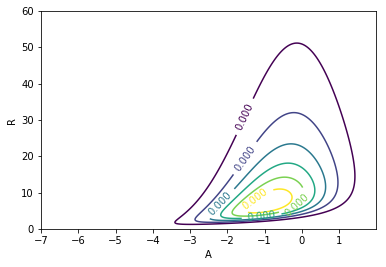

In [20]:
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.special import gammaln 

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

v = 0.4
beta = 250
x0 = 1
x1 = -6
P = 1.2

deltaA = 0.02
deltaR = 0.05
a = np.arange(-7, 2.0, deltaA)
r = np.arange(10**-4, 60, deltaR)
A, R = np.meshgrid(a, r)

logQx1x0 = -1/2*x1**2/R+x1*x0*A/R-1/2*x0**2*A**2/R-1/2*np.log(2*np.pi*R)
logQA = -A**2/(2*P)-1/2*np.log(2*np.pi*P)
logQR = -(v+1)*np.log(R)-v/(beta*R)-gammaln(v)+v*np.log(v/beta)

Q = np.exp(logQx1x0+logQA+logQR)

plt.figure()
CS = plt.contour(A, R, Q)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('A')
plt.ylabel('R')
plt.show()


## Part II
\begin{align}
A \sim \mathcal{N}(A; 0, P) \\
R \sim \mathcal{IG}(R; \mathcal{v}, \frac{\mathcal{v}}\beta) \\
x_k | x_{k-1} \sim \mathcal{N}(x_k;Ax_{k-1},R)
\end{align}

#### Derive and implement an EM algorithm to find the MAP estimate
\begin{align}
R^* = argmax  p(R|x_o,x_1,\theta)
\end{align}

\begin{eqnarray}
KL(q(R|x_0,x_1) || p(R|x_0,x_1,\theta) = \int q(R|x_0,x_1) log \frac{q(R|x_0,x_2)}p(R|x_0,x_1) \\
KL(q(R|x_0,x_1) || p(R|x_0,x_1,\theta) = \bigg \langle log(q(R|x_0,x_1))\bigg \rangle_{q(R|x_0,x_1)} - \bigg \langle log(p(R|x_0,x_1))\bigg \rangle_{q(R|x_0,x_1)}\\
\end{eqnarray}

Second term is the energy term and we're trying to maximize this.
EM has two steps 
E step : fix parameters, find distributions 
M step : fix q(R), find parameters 

\begin{eqnarray}
& q(A) \propto exp(\big \langle log(\phi_{AR})_{q(R)} \big \rangle) \\
&&=exp(-\frac{A^2}{2P} + \big \langle x_ox_1\frac{A}R-\frac{1}2 \frac{x_o^2A^2}R\big \rangle_{q(R)} ) \\
&&=exp \left(-\frac{1}2A^2 \left(\frac{1}P+x_0^2\langle\frac{1}R\rangle_{q(R)}\right)+x_0x_1\langle\frac{1}R\rangle_{q(R)}A  \right)
\end{eqnarray}
The mean and variance are :
\begin{eqnarray}
&&\Sigma = \left(\frac{1}P+x_0^2\langle\frac{1}R\rangle_{q(R)}\right)^{-1} = \left(\frac{1}P+x_0^2\frac{a}b\right)^{-1}
m = \Sigma x_0x_1\langle\frac{1}R\rangle_{q(R)} = \Sigma x_0x_1\frac{a}b
\end{eqnarray}

Same is true for :
\begin{eqnarray}
&q(R) \propto exp(\big \langle log(\phi_{AR})_{q(A)} \big \rangle) \\
&&=exp \left(- (\mathcal{v}+1+\frac{1}2)logR-\left( \frac{\mathcal{v}}\beta+\frac{x_1^2}2 \right)\frac{1}R + \langle -x_ox_1A+\frac{1}2x_0^2A^2\rangle_{q(A)}\frac{1}R \right) \\
&&=exp \left( - (\mathcal{v}+1+\frac{1}2)logR-\left( \frac{\mathcal{v}}\beta+\frac{x_1^2}2 - x_ox_1 \langle A \rangle_{q(A)}+\frac{1}2x_0^2 \langle A^2 \rangle_{q(A)}\right)\frac{1}R \right)
\end{eqnarray}
where a and b values are :
\begin{eqnarray}
&&a=\mathcal{v}+1 \\
&&b=\frac{\mathcal{v}}\beta + \frac{x_1^2}2 - x_ox_1 \langle A \rangle_{q(A)}+\frac{1}2x_0^2 \langle A^2 \rangle_{q(A)} \\
&&b= \frac{\mathcal{v}}\beta + \frac{x_1^2}2 - x_ox_1 m+\frac{1}2x_0^2 \left( m^2+\Sigma \right)
\end{eqnarray}

To find the maxima :
\begin{eqnarray}
&&A^* = m\\
&&R^* = \frac{b}{a+1}
\end{eqnarray}

In [44]:
# Expectation Maximixation for p(R|x0,x1,Q)

v = 0.4
beta = 100
x0 = 1
x1 = -6
P = 1.2
N = 30

mA = 30 # init random distr. with this moment
sigmaA = 1
prevMaxR = -99

for i in range(1,N):
    
    # find moments of R wrt A and its parameters
    a = v+1
    b = v/beta + x1**2/2-x0*x1*mA+x0**2*(mA**2+sigmaA)/2
    
    # Create the distribution with moments
    sigmaA = 1/(1/P+x0**2*a/b)
    mA = sigmaA*x0*x1*a/b
    
    maxR = b/(a+1)
    print ("Max for R : ",maxR)
    if abs(prevMaxR-maxR)<0.001:
        break
    else:
        prevMaxR = maxR


Max for R :  270.21000000000004
Max for R :  7.712312509901395
Max for R :  6.534624346149499
Max for R :  6.3463378394718095
Max for R :  6.310712129019102
Max for R :  6.303767794870588
Max for R :  6.302406392785515
Max for R :  6.30213919738206


In [45]:
# Expectation Maximixation for p(A|x0,x1,Q)

v = 0.4
beta = 100
x0 = 1
x1 = -6
P = 1.2
N = 30

mA = 30 # init random distr. with this moment
sigmaA = 1
prevMaxA = -99

for i in range(1,N):
    
    # find moments of R wrt A and its parameters
    a = v+1
    b = v/beta + x1**2/2-x0*x1*mA+x0**2*(mA**2+sigmaA)/2
    
    # Create the distribution with moments
    sigmaA = 1/(1/P+x0**2*a/b)
    mA = sigmaA*x0*x1*a/b
    
    maxA = mA
    print ("Max for A : ",maxA)
    if abs(prevMaxA-maxA)<0.001:
        break
    else:
        prevMaxA = maxA

Max for A :  -0.015503303680188993
Max for A :  -0.49926818518172605
Max for A :  -0.5805415456346915
Max for A :  -0.5960543044746813
Max for A :  -0.5990832204641727
Max for A :  -0.5996772198924115
